In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Create dummy data using sklearn

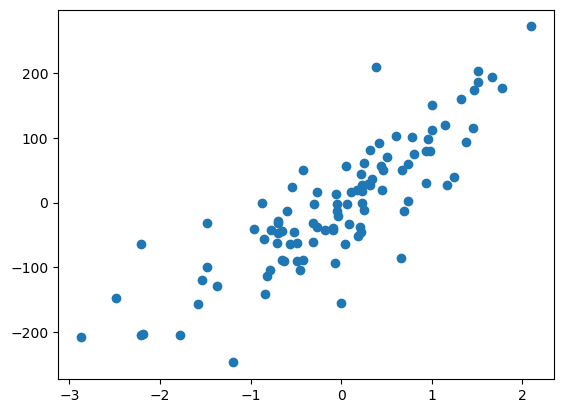

In [7]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features= 1, n_targets=1,n_informative=1,noise = 50, random_state=28)
plt.scatter(X,y)

## Using Sklearn Linear regression module

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[86.62507058]
0.09330836209561388


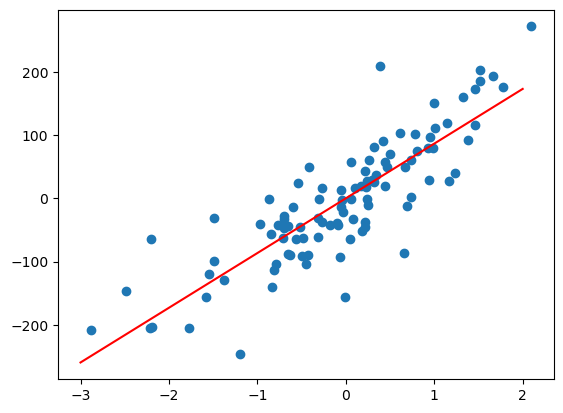

In [11]:
x_tick = np.linspace(-3,2,100)
plt.plot(x_tick,lr.predict(x_tick.reshape(-1,1)),c = 'red')
plt.scatter(X,y)

## Create own GD Regressor

In [63]:
class MyGradRegressor:
    
    def __init__(self,m_init,b_init,rate,epoch):
        self.m = m_init
        self.b = b_init
        self.rate = rate
        self.epoch = epoch
        
        
    def fit(self,X,y):
        b_list = [self.b]
        
        for e in range(self.epoch):
            loss_slope_b = -2*np.sum(y - self.m*X.ravel() - self.b)
        
            loss_slope_m = -2*np.sum(np.dot((y - self.m*X.ravel() - self.b),X.ravel()))
            
            self.b = self.b - self.rate*loss_slope_b
            self.m = self.m - self.rate*loss_slope_m
            
            b_list.append(self.b)
#         print(np.round(b_list,3))
            
    def predict(self,X2):
        y2 = self.m*X2 +self.b
        return y2

In [64]:
model = MyGradRegressor(0,0,0.001,100)

In [66]:
model.fit(X,y)

In [68]:
print('Coeffecient',model.m)
print('Intercept',model.b)


Coeffecient 86.625070583593
Intercept 0.09330836209561148


In [31]:
X.ravel()

array([ 1.23939986,  0.73488026, -2.87742267, -0.65033427, -0.42275153,
       -1.37437529, -0.18372453, -0.04265609,  0.31423418,  0.17680895,
       -1.77546915,  0.46144492, -0.05697024,  1.51461999,  0.98415707,
       -1.57887712, -1.48626246,  0.93678017, -0.31457692,  0.93410784,
       -2.20445282, -0.78519484, -0.60245944, -0.65141987,  0.29969372,
       -0.45268082,  2.09881798,  0.73705619,  0.42074053,  1.45987213,
        1.45768767, -0.87314884, -0.31016571,  1.77872202, -0.70208034,
        0.44633238,  1.66912005, -0.41717311,  1.51424981, -0.69513574,
        1.17109629, -0.3023687 ,  0.0860073 , -0.49311281,  1.1482007 ,
        0.69386264, -2.48470399,  0.23442597,  0.22183904,  0.31401692,
        1.37986286,  0.23428583, -0.7698761 , -0.81553033, -2.20968693,
       -2.1896371 ,  0.33687044, -0.03439246,  0.4394821 ,  1.32104666,
       -0.09528633, -1.54225597, -0.71130376,  0.38768045,  0.95226643,
        0.05918843, -0.48685766, -0.05047256,  0.65818808, -0.07

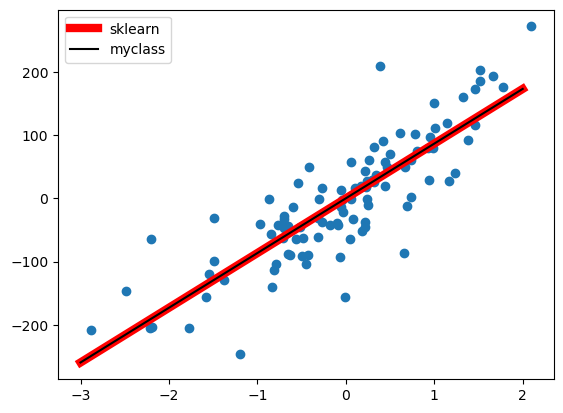

In [79]:
x_tick = np.linspace(-3,2,100)
plt.plot(x_tick,lr.predict(x_tick.reshape(-1,1)),c = 'red',label = 'sklearn',lw = 6)
plt.plot(x_tick,model.predict(x_tick.reshape(-1,1)),c = 'black', label = 'myclass')
plt.scatter(X,y)
plt.legend()